# Machine learning 

#### Importing the ML feeding table

In [1]:
from google.cloud import bigquery
import pandas as pd
from dotenv import load_dotenv
import os
from sklearn.cluster import KMeans
import numpy as np4
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

# Now you can use the environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")


# Create a BigQuery client
client = bigquery.Client()

# Your BigQuery query
query = """
SELECT * FROM `big-mamma-project.ML_tables.ML_table_3_booking_order_not_null`
"""

# Run the query and convert it to a pandas dataframe
ml = client.query(query,location="EU").to_dataframe()

# Now df is a pandas DataFrame containing the results of the query
ml.drop(columns="order_id",inplace=True)
ml.head(10)

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,...,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,6,27.22,<NA>,6.0,2.0,0.0,1.0,1,<NA>,<NA>
1,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,45.22,<NA>,2.0,4.0,0.0,4.0,1,<NA>,<NA>
2,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,3,20.68,<NA>,1.0,1.0,0.0,1.0,1,<NA>,<NA>
3,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,18.59,<NA>,2.0,0.0,0.0,3.0,1,<NA>,<NA>
4,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,20.28,<NA>,2.0,0.0,1.0,1.0,1,<NA>,<NA>
5,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,4,30.31,<NA>,4.0,0.0,0.0,4.0,1,<NA>,<NA>
6,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,25.86,<NA>,2.0,1.0,1.0,1.0,1,<NA>,<NA>
7,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,20.79,<NA>,2.0,0.0,0.0,1.0,1,<NA>,<NA>
8,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,2,30.42,<NA>,1.0,0.0,1.0,1.0,1,<NA>,<NA>
9,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,40.63,<NA>,2.0,0.0,1.0,2.0,1,<NA>,<NA>


## DF preparation


#### Finding and filling NAs

In [2]:
#Displaying NAs count per column
ml.isnull().sum()

Sunday                   591450
Monday                   613246
Tuesday                  615280
Wednesday                611247
Thursday                 604794
Friday                   595463
Saturday                 580022
card_payment             590786
invoice_payment          201795
cash_payment             675693
DINNER                   320106
LUNCH                    456279
AFTERNOON                650500
actual_duration           21666
covers                    21666
revenue_per_cover         21666
high_spender             597503
total_main_items          44790
total_starters_items      44790
total_desserts_items      44790
total_beverages_items     44790
total_visits                779
total_cancellations      697814
total_noshows            698064
dtype: int64

In [3]:
ml.dtypes

Sunday                     Int64
Monday                     Int64
Tuesday                    Int64
Wednesday                  Int64
Thursday                   Int64
Friday                     Int64
Saturday                   Int64
card_payment               Int64
invoice_payment            Int64
cash_payment               Int64
DINNER                     Int64
LUNCH                      Int64
AFTERNOON                  Int64
actual_duration            Int64
covers                     Int64
revenue_per_cover        float64
high_spender               Int64
total_main_items         float64
total_starters_items     float64
total_desserts_items     float64
total_beverages_items    float64
total_visits               Int64
total_cancellations        Int64
total_noshows              Int64
dtype: object

# NAs filling methods

#### Mean value

#### Linear interpolation

In [4]:
# Linear interpolation
ml = ml.astype(float).interpolate(method='linear')
ml.isnull().sum()


Sunday                    277
Monday                    140
Tuesday                    20
Wednesday                   0
Thursday                  820
Friday                    653
Saturday                  459
card_payment                5
invoice_payment             0
cash_payment               50
DINNER                     20
LUNCH                       0
AFTERNOON                  95
actual_duration             0
covers                      0
revenue_per_cover           0
high_spender               11
total_main_items            0
total_starters_items        0
total_desserts_items        0
total_beverages_items       0
total_visits                0
total_cancellations      1291
total_noshows            2300
dtype: int64

In [5]:
ml.fillna(0,inplace=True)
ml.isnull().sum()

Sunday                   0
Monday                   0
Tuesday                  0
Wednesday                0
Thursday                 0
Friday                   0
Saturday                 0
card_payment             0
invoice_payment          0
cash_payment             0
DINNER                   0
LUNCH                    0
AFTERNOON                0
actual_duration          0
covers                   0
revenue_per_cover        0
high_spender             0
total_main_items         0
total_starters_items     0
total_desserts_items     0
total_beverages_items    0
total_visits             0
total_cancellations      0
total_noshows            0
dtype: int64

In [17]:
ml.reset_index(drop = True, inplace=True)
ml.corr()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,...,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
Sunday,1.000000,0.710856,0.268655,NaN,0.580984,0.651128,0.776742,0.134326,NaN,0.424790,...,0.000042,0.002116,0.199239,0.002637,-0.000667,0.000033,0.002264,NaN,0.462872,0.346534
Monday,0.710856,1.000000,0.377932,NaN,0.412996,0.462858,0.552152,0.188964,NaN,0.597576,...,0.000029,0.000935,0.280280,0.002212,-0.000396,0.000885,0.000854,NaN,0.329035,0.246336
Tuesday,0.268655,0.377932,1.000000,NaN,0.156084,0.174929,0.208676,0.499995,NaN,0.632442,...,0.000011,0.002291,0.741615,0.000722,0.001043,0.002291,0.001398,NaN,0.124353,0.093098
Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thursday,0.580984,0.412996,0.156084,NaN,1.000000,0.892273,0.747975,0.078041,NaN,0.246796,...,0.000073,0.002647,0.115754,0.007581,0.001207,-0.002282,0.002677,NaN,0.796704,0.596461
Friday,0.651128,0.462858,0.174929,NaN,0.892273,1.000000,0.838281,0.087463,NaN,0.276593,...,0.000064,0.003642,0.129730,0.007074,0.002285,-0.001769,0.002923,NaN,0.710878,0.532206
Saturday,0.776742,0.552152,0.208676,NaN,0.747975,0.838281,1.000000,0.104337,NaN,0.329953,...,0.000054,0.003257,0.154757,0.005219,0.001952,-0.001140,0.003588,NaN,0.595915,0.446138
card_payment,0.134326,0.188964,0.499995,NaN,0.078041,0.087463,0.104337,1.000000,NaN,0.316218,...,0.000005,0.001517,0.674197,-0.000238,0.000356,0.001403,0.001295,NaN,0.062176,0.046549
invoice_payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cash_payment,0.424790,0.597576,0.632442,NaN,0.246796,0.276593,0.329953,0.316218,NaN,1.000000,...,0.000018,0.001105,0.469028,0.002378,0.000186,0.001245,0.001511,NaN,0.196624,0.147204


In [19]:
ml.describe()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,...,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
count,698306.000000,698306.000000,698306.000000,698306.0,698306.000000,698306.000000,698306.000000,698306.000000,698306.0,698306.000000,...,698306.000000,698306.000000,698306.000000,698306.000000,698306.000000,698306.000000,698306.000000,698306.0,698306.000000,698306.000000
mean,0.999603,0.999800,0.999971,1.0,0.998826,0.999065,0.999343,0.999993,1.0,0.999928,...,6.291329,36.583589,0.999984,2.451057,1.615514,0.881213,3.521739,1.0,0.998151,0.996706
std,0.019913,0.014158,0.005352,0.0,0.034248,0.030565,0.025630,0.002676,0.0,0.008461,...,1761.361729,17.965837,0.003969,1.675953,1.618263,1.299444,3.145158,0.0,0.042957,0.057296
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,1.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,2.000000,26.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.0,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,2.000000,33.790000,1.000000,2.000000,1.000000,0.000000,3.000000,1.0,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,3.000000,43.450000,1.000000,3.000000,2.000000,1.000000,4.456789,1.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,999999.000000,1811.730000,1.000000,67.000000,71.000000,44.000000,156.000000,1.0,1.000000,1.000000


#### Correlation check and heatmap

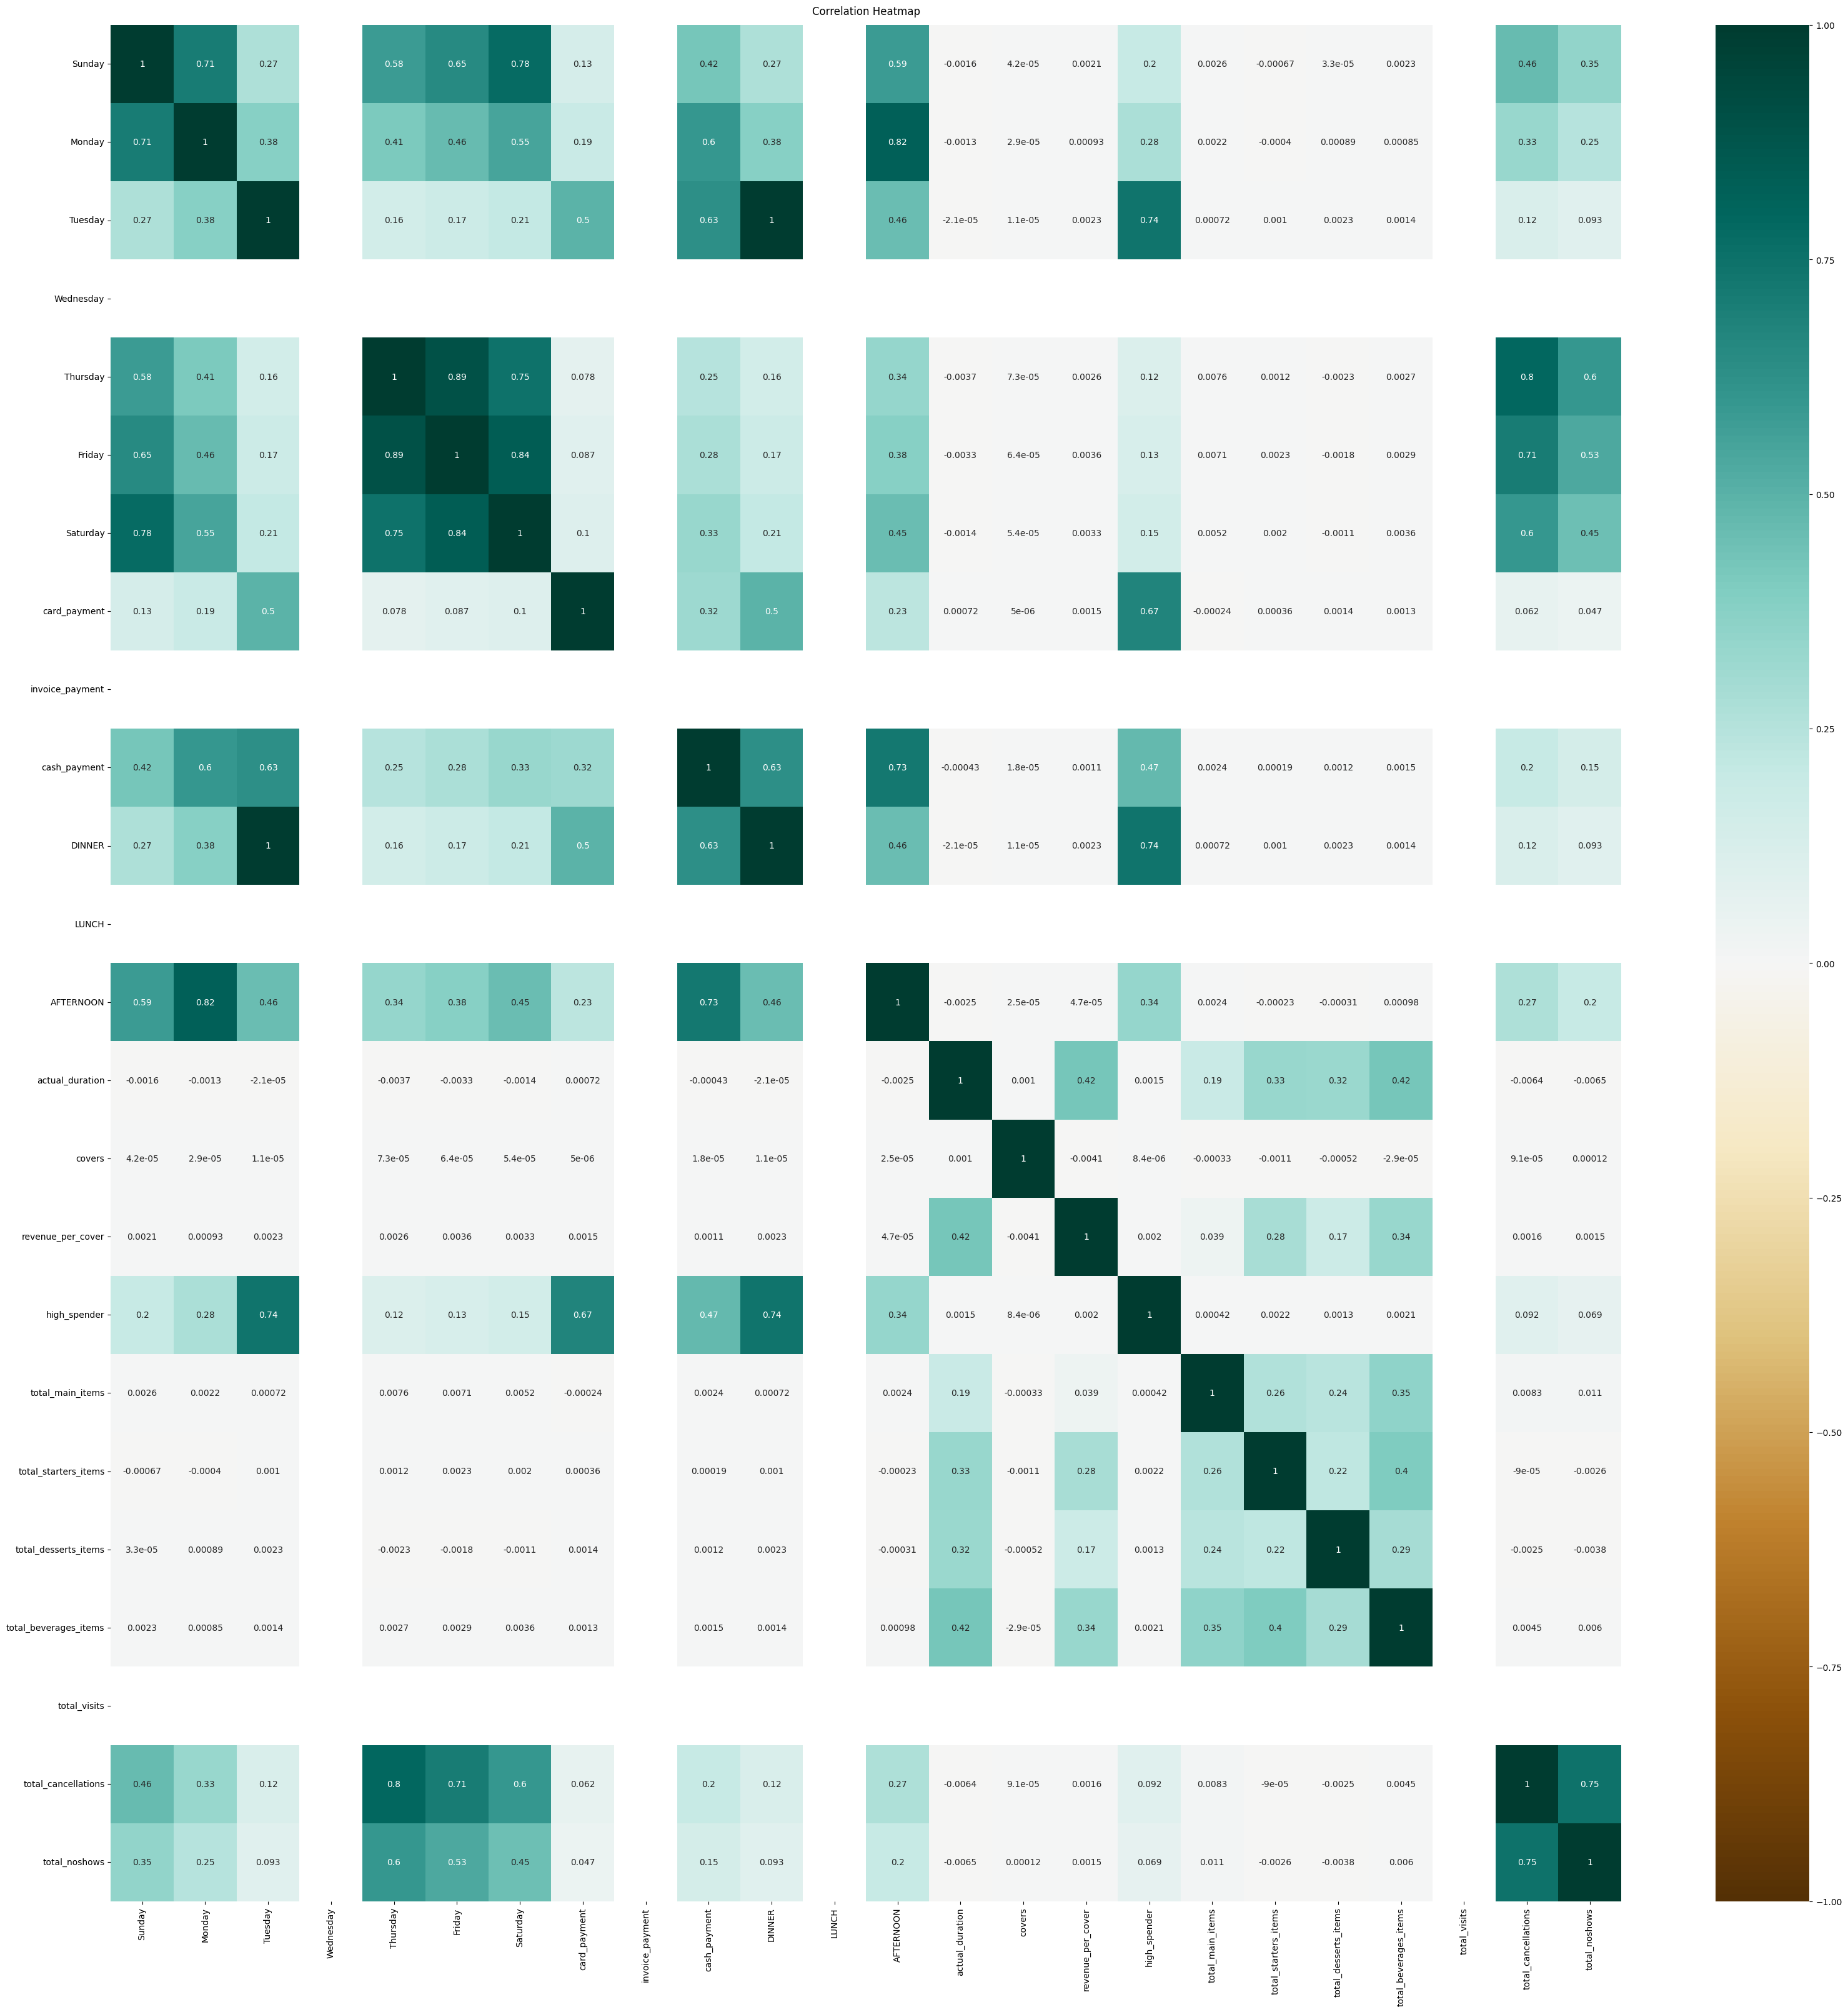

In [15]:
# Increase the size of the heatmap.
plt.figure(figsize=(39, 39))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(ml.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

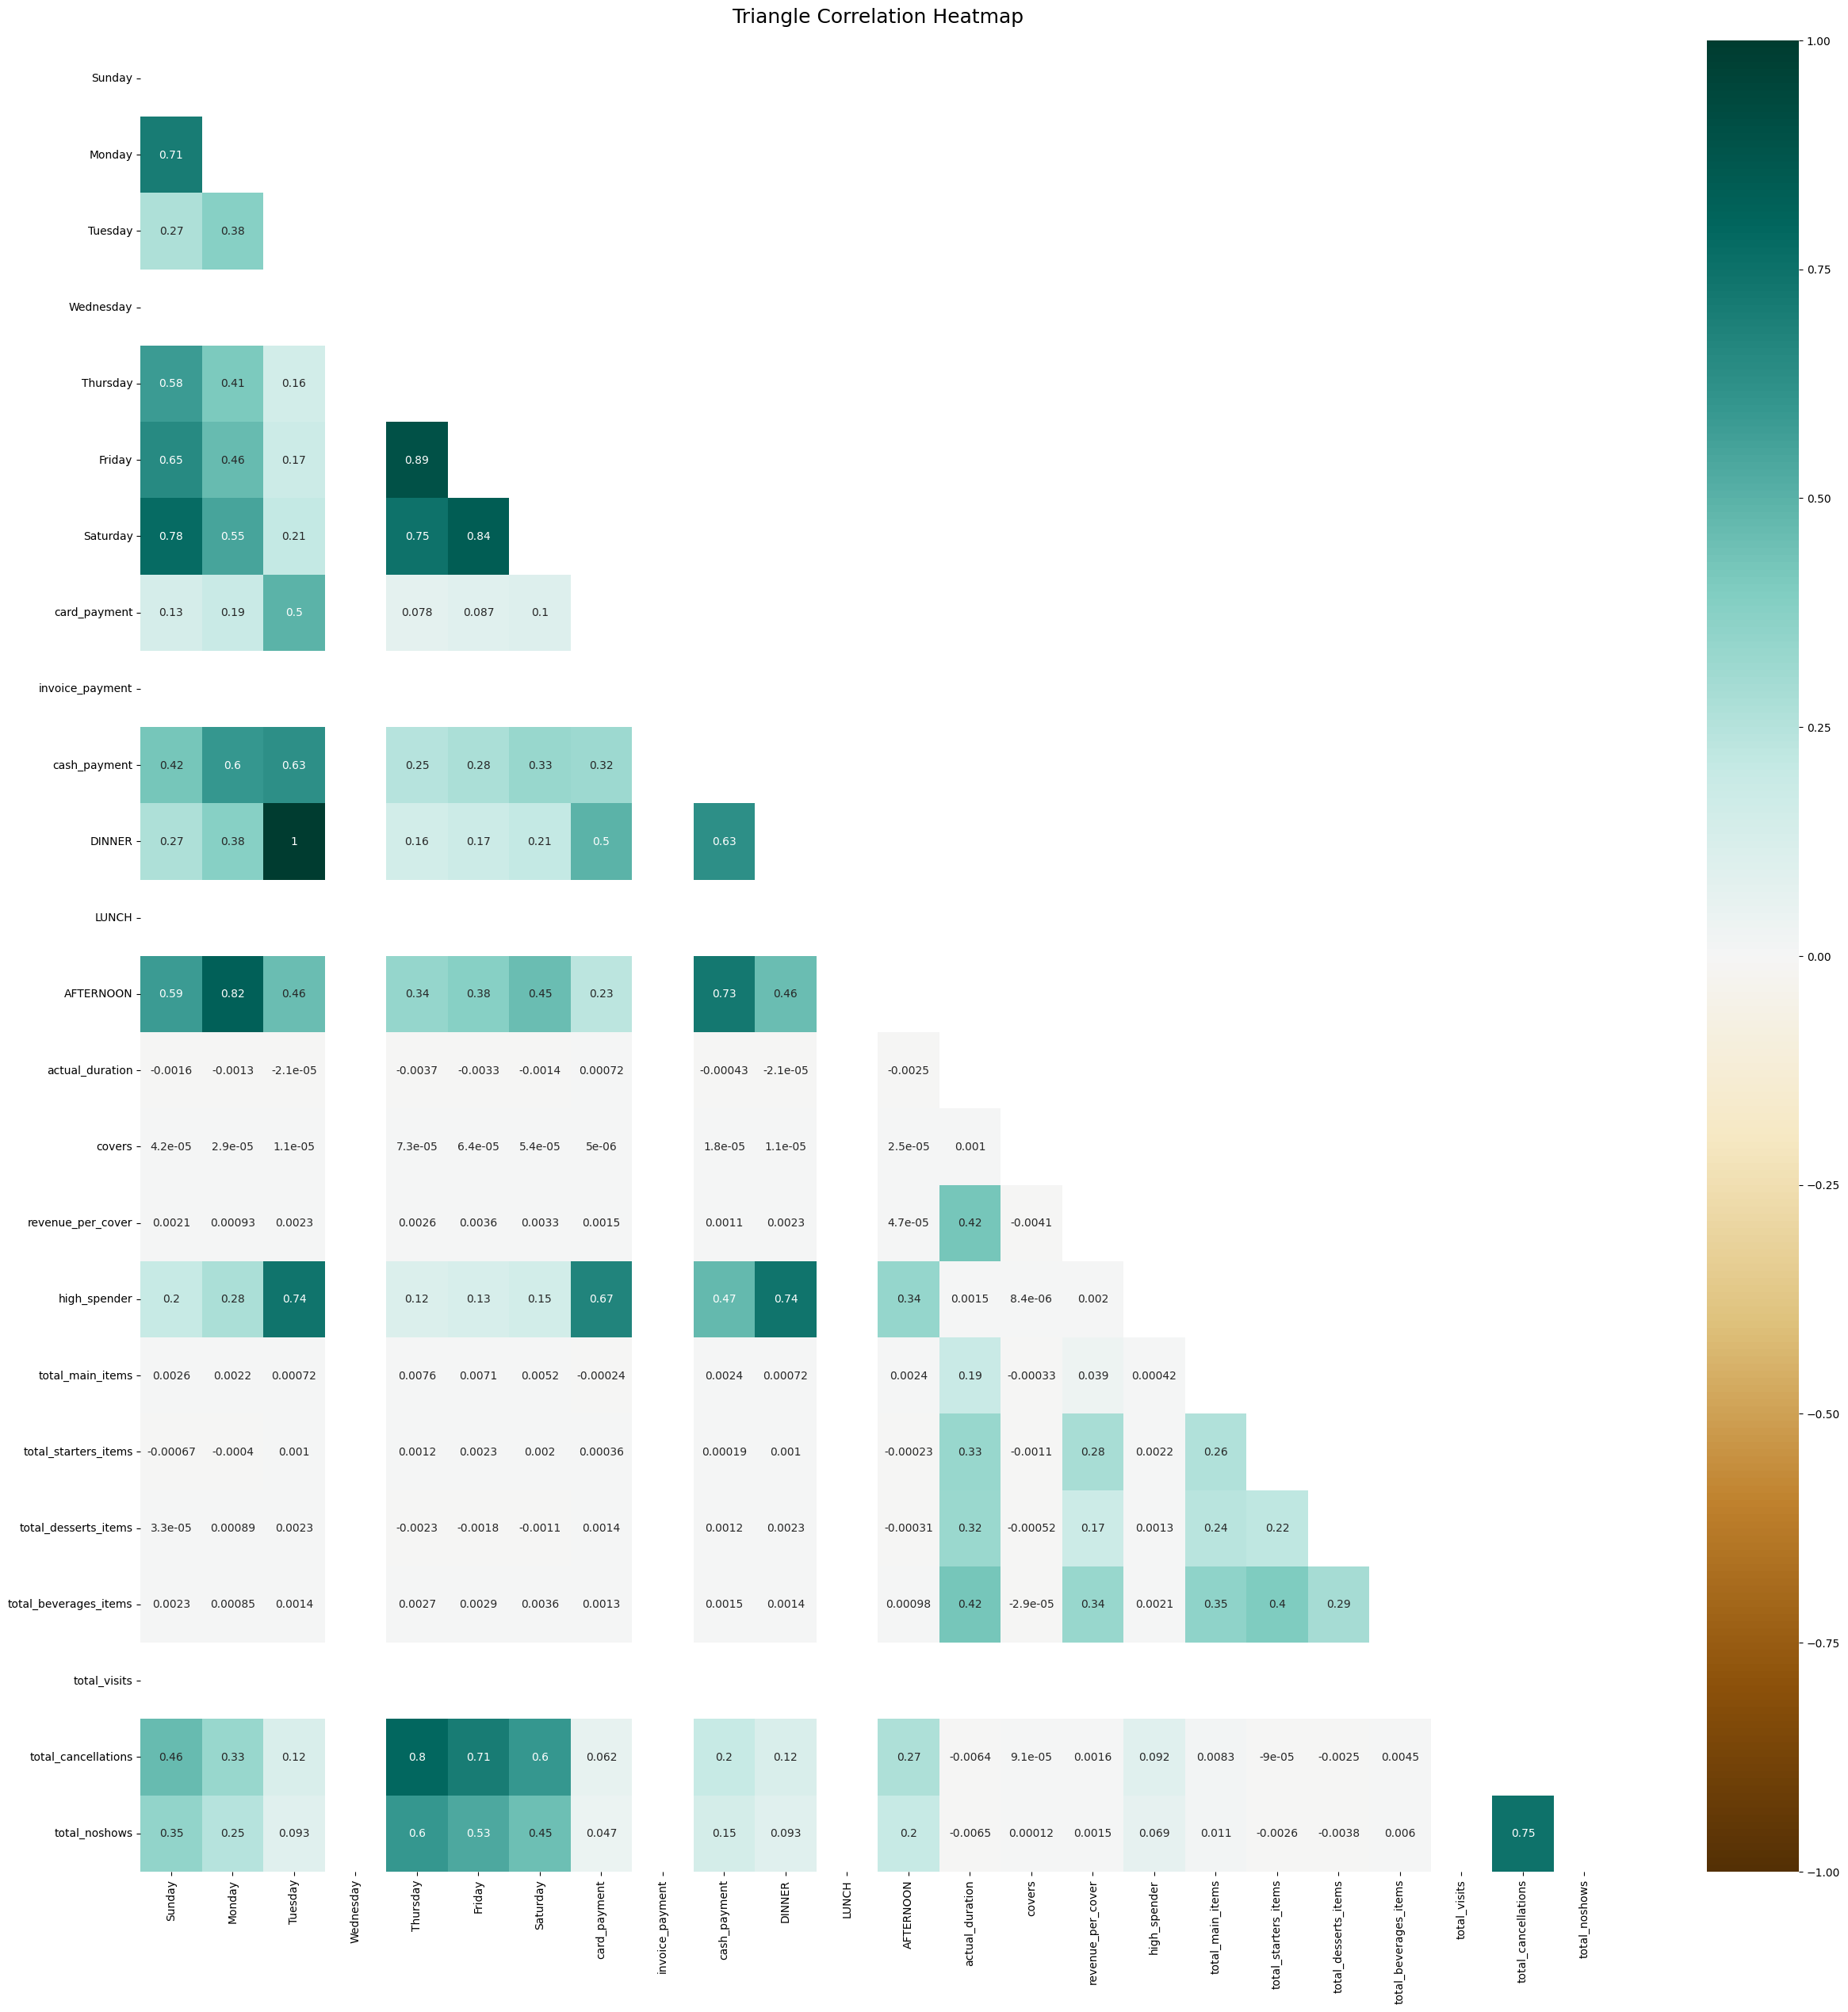

In [13]:
plt.figure(figsize=(30, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(ml.corr(), dtype=bool))
heatmap = sns.heatmap(ml.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

#### Distribution check

In [21]:
ml_distribution = pd.DataFrame(ml.sum(axis=0))
ml_distribution.rename(columns={0:'count'},inplace=True)
ml_distribution['percent'] = round((ml_distribution['count']/len(ml))*100,2)
ml_distribution.sort_values(by='percent',ascending=True)

,count,percent
total_desserts_items,6.153565e+05,88.12
total_noshows,6.960060e+05,99.67
total_cancellations,6.970150e+05,99.82
Thursday,6.974860e+05,99.88
Friday,6.976530e+05,99.91
Saturday,6.978470e+05,99.93
Sunday,6.980290e+05,99.96
Monday,6.981660e+05,99.98
cash_payment,6.982560e+05,99.99
AFTERNOON,6.982110e+05,99.99


In [ ]:
ml.drop(columns=['difficult_client','seating_aera','good_client','toxic_client','medical_condition','special_guest','VIP'],inplace=True)


#### Scaling features


In [22]:
#Scaling the ML table and storing the output 
#Initializing and training scaler 
scaler=StandardScaler()
ml_scaled=scaler.fit_transform(ml)


In [23]:
#Checking our scaled features 
ml_scaled_df=pd.DataFrame(ml_scaled,columns=scaler.get_feature_names_out())
ml_scaled_df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,...,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
0,-50.199206,-70.617986,-186.853686,0.0,-29.164922,-32.686103,-38.991843,-373.711386,0.0,-118.174109,...,-0.000165,-0.521189,-251.955083,2.117569,0.237592,-0.678147,-0.801785,0.0,-23.235817,-17.395727
1,-50.199206,-70.617986,-186.853686,0.0,-29.164922,-32.686103,-38.991843,-373.711386,0.0,-118.174109,...,-0.002436,0.480713,-251.955083,-0.269135,1.473486,-0.678147,0.152063,0.0,-23.235817,-17.395727
2,-50.199206,-70.617986,-186.853686,0.0,-29.164922,-32.686103,-38.991843,-373.711386,0.0,-118.174109,...,-0.001869,-0.885213,-251.955083,-0.865810,-0.380355,-0.678147,-0.801785,0.0,-23.235817,-17.395727
3,-50.199206,-70.617986,-186.853686,0.0,-29.164922,-32.686103,-38.991843,-373.711386,0.0,-118.174109,...,-0.002436,-1.001545,-251.955083,-0.269135,-0.998302,-0.678147,-0.165887,0.0,-23.235817,-17.395727
4,-50.199206,-70.617986,-186.853686,0.0,-29.164922,-32.686103,-38.991843,-373.711386,0.0,-118.174109,...,-0.002436,-0.907478,-251.955083,-0.269135,-0.998302,0.091414,-0.801785,0.0,-23.235817,-17.395727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698301,0.019921,0.014161,0.005352,0.0,0.034288,0.030594,0.025646,0.002676,0.0,0.008462,...,-0.002436,0.338221,0.003969,0.327541,0.237592,-0.678147,0.787961,0.0,0.043037,0.057485
698302,0.019921,0.014161,0.005352,0.0,0.034288,0.030594,0.025646,0.002676,0.0,0.008462,...,0.000402,-1.189680,0.003969,2.117569,-0.380355,-0.678147,-1.119734,0.0,0.043037,0.057485
698303,0.019921,0.014161,0.005352,0.0,0.034288,0.030594,0.025646,0.002676,0.0,0.008462,...,-0.001869,-1.189680,0.003969,-0.269135,-0.380355,-0.678147,-1.119734,0.0,0.043037,0.057485
698304,0.019921,0.014161,0.005352,0.0,0.034288,0.030594,0.025646,0.002676,0.0,0.008462,...,-0.002436,-0.675371,0.003969,-0.269135,-0.380355,-0.678147,-0.801785,0.0,0.043037,0.057485


#### First clustering test 

labels
0    505158
1    193128
2        20
Name: Sunday, dtype: int64


<Axes: xlabel='labels', ylabel='count'>

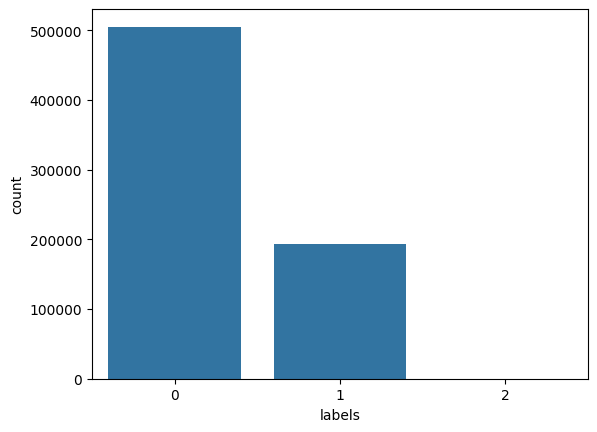

In [25]:
#Lauching clustering prediction
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(ml_scaled)
labels_scaled=kmeans.predict(ml_scaled)

#Applying labels to the original dataframe
ml['labels']=labels_scaled
ml_distrib=ml.groupby('labels',as_index=True)['Sunday'].count()

#Printing number + graph to vizualize 
print(ml_distrib)
sns.countplot(ml,x='labels')

# Silhouette and Elbow check to find the proper number of cluster 

#### Silhouette method 

In [ ]:

# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np
# import matplotlib.style as style

# range_n_clusters = [2, 3, 4, 5, 6]
# silhouette_avg_n_clusters = []

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     # fig, (ax1, ax2) = plt.subplots(1, 2)
#     # fig.set_size_inches(18, 7)

#     # # The 1st subplot is the silhouette plot
#     # # The silhouette coefficient can range from -1, 1 but in this example all
#     # # lie within [-0.1, 1]
#     # ax1.set_xlim([-0.1, 1])
#     # # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # # plots of individual clusters, to demarcate them clearly.
#     # ax1.set_ylim([0, len(ml_scaled) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, n_init=5, random_state=0)
#     cluster_labels = clusterer.fit_predict(ml)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(ml, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     silhouette_avg_n_clusters.append(silhouette_avg)
#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(ml, cluster_labels)

# #     y_lower = 10
# #     for i in range(n_clusters):
# #         # Aggregate the silhouette scores for samples belonging to
# #         # cluster i, and sort them
# #         ith_cluster_silhouette_values = \
# #             sample_silhouette_values[cluster_labels == i]

# #         ith_cluster_silhouette_values.sort()

# #         size_cluster_i = ith_cluster_silhouette_values.shape[0]
# #         y_upper = y_lower + size_cluster_i

# #         color = cm.nipy_spectral(float(i) / n_clusters)
# #         ax1.fill_betweenx(np.arange(y_lower, y_upper),
# #                           0, ith_cluster_silhouette_values,
# #                           facecolor=color, edgecolor=color, alpha=0.7)

# #         # Label the silhouette plots with their cluster numbers at the middle
# #         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

# #         # Compute the new y_lower for next plot
# #         y_lower = y_upper + 10  # 10 for the 0 samples

# #     ax1.set_title("The silhouette plot for the various clusters.")
# #     ax1.set_xlabel("The silhouette coefficient values")
# #     ax1.set_ylabel("Cluster label")

# #     # The vertical line for average silhouette score of all the values
# #     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# #     ax1.set_yticks([])  # Clear the yaxis labels / ticks
# #     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# #     # 2nd Plot showing the actual clusters formed
# #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
# #     ax2.scatter(ml_scaled[:, 0], ml_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
# #                 c=colors, edgecolor='k')

# #     # Labeling the clusters
# #     centers = clusterer.cluster_centers_
# #     # Draw white circles at cluster centers
# #     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
# #                 c="white", alpha=1, s=200, edgecolor='k')

# #     for i, c in enumerate(centers):
# #         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
# #                     s=50, edgecolor='k')

# #     ax2.set_title("The visualization of the clustered data.")
# #     ax2.set_xlabel("Feature space for the 1st feature")
# #     ax2.set_ylabel("Feature space for the 2nd feature")

# #     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
# #                   "with n_clusters = %d" % n_clusters),
# #                  fontsize=14, fontweight='bold')

# # plt.show()


# # style.use("fivethirtyeight")
# # plt.plot(range_n_clusters, silhouette_avg_n_clusters)
# # plt.xlabel("Number of Clusters (k)")
# # plt.ylabel("silhouette score")
# # plt.show()


#### Elbow method 

In [29]:
#Elbow method
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:
     kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(ml_scaled)
     inertias.append(kmeans.inertia_)
print(inertias )

[13966120.000000421, 12979453.462005217, 10079465.060538054, 8317274.802397152, 7961607.555557199, 6483019.234732886, 5729104.215655459, 5321944.4325521, 4873375.723792901]


In [30]:
#Plotting the inertias
import plotly.express as px 
fig = px.line(inertias)
fig.show()

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,n_init="auto")
 kmeans.fit(ml_scaled)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

# Exploring results

##### Heatmap

In [28]:
# Analyzing Cluster Results
import matplotlib.pyplot as plt
import seaborn as sns

#Creating heatmap
cm = sns.light_palette("green", as_cmap=True)
#a remettre en ml au lieu de ml_scaled
ml.groupby('labels')[ml.columns[1:-1]].mean().style.background_gradient(cmap=cm)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,DINNER,LUNCH,AFTERNOON,actual_duration,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
labels,,,,,,,,,,,,,,,,,,,,,,,
0,0.999772,1.000000,1.000000,0.998549,0.998828,0.999171,1.000000,1.000000,0.999941,1.000000,1.000000,0.999857,72.469590,7.362350,31.467258,1.000000,2.094917,1.139539,0.531159,2.456512,1.000000,0.997775,0.996215
1,0.999974,1.000000,1.000000,0.999653,0.999788,0.999896,1.000000,1.000000,1.000000,1.000000,1.000000,0.999984,121.870333,3.490272,49.966990,1.000000,3.382621,2.860538,1.796895,6.308100,1.000000,0.999239,0.998095
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,1.000000,0.000000,86.275000,2.700000,28.893250,0.450000,2.225000,1.300000,0.325000,2.700000,1.000000,0.000000,0.000000


#### Scatter plot

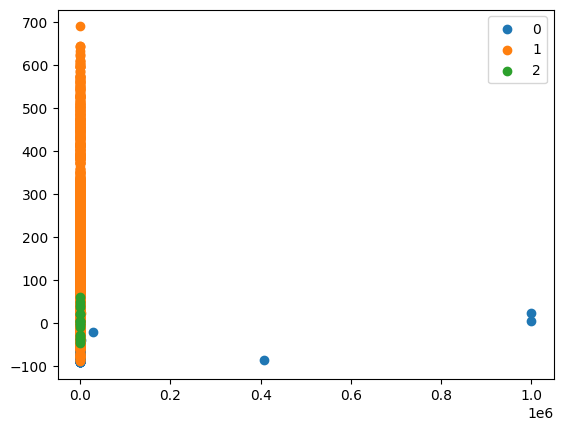

In [31]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Transform the data
pca = PCA(2)
ml_results= pca.fit_transform(ml)


#Getting unique labels
u_labels = np.unique(labels_scaled)
 
#plotting the results:
for i in u_labels:
    plt.scatter(ml_results[labels_scaled == i , 0] , ml_results[labels_scaled == i , 1] , label= i)
plt.legend()
plt.show()

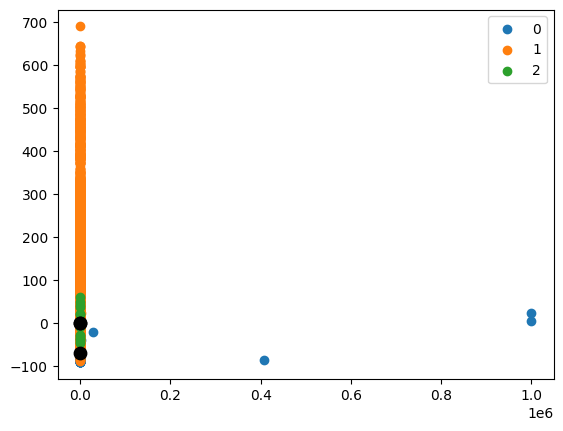

In [27]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels_scaled)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ml_results[labels_scaled == i , 0] , ml_results[labels_scaled == i , 1] , label= i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()